In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data cleaning


In [2]:
df_makers= pd.read_csv('electric_vehicle_sales_by_makers.csv')
df_date=pd.read_csv('dim_date.csv')
df_sales=pd.read_csv('electric_vehicle_sales_by_state.csv')

In [3]:
df_makers.head(), df_date.head(), df_sales.head()

(        date vehicle_category         maker  electric_vehicles_sold
 0  01-Apr-21       2-Wheelers  OLA ELECTRIC                       0
 1  01-Apr-22       2-Wheelers      OKAYA EV                       0
 2  01-May-21       2-Wheelers  OLA ELECTRIC                       0
 3  01-Jun-21       2-Wheelers  OLA ELECTRIC                       0
 4  01-Jul-21       2-Wheelers  OLA ELECTRIC                       0,
         date  fiscal_year quarter
 0  01-Apr-21         2022      Q1
 1  01-May-21         2022      Q1
 2  01-Jun-21         2022      Q1
 3  01-Jul-21         2022      Q2
 4  01-Aug-21         2022      Q2,
         date   state vehicle_category  electric_vehicles_sold  \
 0  01-Apr-21  Sikkim       2-Wheelers                       0   
 1  01-Apr-21  Sikkim       4-Wheelers                       0   
 2  01-May-21  Sikkim       2-Wheelers                       0   
 3  01-May-21  Sikkim       4-Wheelers                       0   
 4  01-Jun-21  Sikkim       2-Wheelers      

In [4]:
df_makers.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   date                    816 non-null    object
 1   vehicle_category        816 non-null    object
 2   maker                   816 non-null    object
 3   electric_vehicles_sold  816 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 25.6+ KB


In [5]:
#checks datatypes for date

df_date.dtypes

date           object
fiscal_year     int64
quarter        object
dtype: object

In [6]:
#date was having object datatypes we have to convert it into datetime datatypes

df_date["date"]=pd.to_datetime(df_date["date"],format='%d-%b-%y')

In [7]:
df_date.dtypes

date           datetime64[ns]
fiscal_year             int64
quarter                object
dtype: object

In [8]:
#checks datatypes for df_makers

df_makers.dtypes

date                      object
vehicle_category          object
maker                     object
electric_vehicles_sold     int64
dtype: object

In [9]:
#change date type for df_makers
df_makers["date"]=pd.to_datetime(df_makers["date"],format='%d-%b-%y')

In [10]:
df_makers.dtypes

date                      datetime64[ns]
vehicle_category                  object
maker                             object
electric_vehicles_sold             int64
dtype: object

In [11]:
#chheck date type for df_sales
df_sales.dtypes

date                      object
state                     object
vehicle_category          object
electric_vehicles_sold     int64
total_vehicles_sold        int64
dtype: object

In [12]:
#change date type for df_sales
df_sales["date"]=pd.to_datetime(df_sales["date"],format='%d-%b-%y')

In [13]:
df_sales.dtypes

date                      datetime64[ns]
state                             object
vehicle_category                  object
electric_vehicles_sold             int64
total_vehicles_sold                int64
dtype: object

In [14]:
df_sales.shape

(2445, 5)

In [15]:
df_sales.head()

,date,state,vehicle_category,electric_vehicles_sold,total_vehicles_sold
0,2021-04-01,Sikkim,2-Wheelers,0,398
1,2021-04-01,Sikkim,4-Wheelers,0,361
2,2021-05-01,Sikkim,2-Wheelers,0,113
3,2021-05-01,Sikkim,4-Wheelers,0,98
4,2021-06-01,Sikkim,2-Wheelers,0,229


In [16]:
df_sales['state'].unique()

array(['Sikkim', 'Andaman & Nicobar Island', 'Arunachal Pradesh', 'Assam',
       'Chhattisgarh', 'DNH and DD', 'Jammu and Kashmir', 'Ladakh',
       'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Puducherry',
       'Tripura', 'Bihar', 'Chandigarh', 'Delhi', 'Madhya Pradesh',
       'Odisha', 'Punjab', 'Uttarakhand', 'Himachal Pradesh',
       'Andaman & Nicobar', 'Haryana', 'Jharkhand', 'Andhra Pradesh',
       'Goa', 'Gujarat', 'Karnataka', 'Kerala', 'Maharashtra',
       'Rajasthan', 'Tamil Nadu', 'Uttar Pradesh', 'West Bengal'],
      dtype=object)

In [17]:
#Replace Andaman&Nicobar with andaman&nicobar island
df_state = df_sales['state'].replace('Andaman & Nicobar', 'Andaman & Nicobar Island')

len(df_state.unique())


34

Question 1:
 List the top 3 and bottom 3 makers for the fiscal years 2023 and 2024 in terms of the 
number of 2-wheelers sold. 

In [18]:
plt.style.use('ggplot')

In [19]:
#Top 3 makers in fiscal year 2023 by number of 2 wheelers sold

df=pd.merge(left=df_date,right=df_makers,on="date",how="inner")
df=df[(df["fiscal_year"]==2023)&(df["vehicle_category"]=="2-Wheelers")]
df=df.groupby(["maker"],as_index=False)["electric_vehicles_sold"].sum().sort_values(by="electric_vehicles_sold",ascending=False).head(3)
df


,maker,electric_vehicles_sold
8,OLA ELECTRIC,152583
7,OKINAWA,96945
4,HERO ELECTRIC,88993


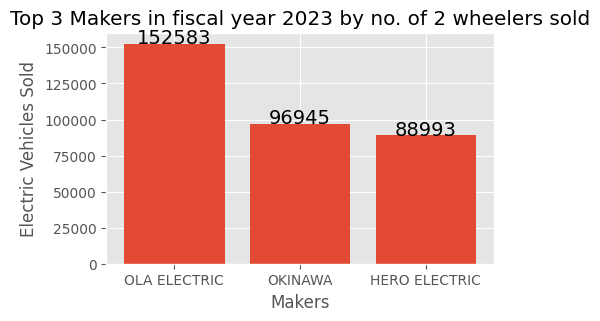

In [20]:
#plot graph

plt.style.use('ggplot')
plt.figure(figsize=(5,3))
plt.bar(df["maker"],df["electric_vehicles_sold"],align="center")
for i,value in enumerate(df["electric_vehicles_sold"]):
  plt.text(i,value +50 , str(value),ha='center',fontsize=14)
plt.title("Top 3 Makers in fiscal year 2023 by no. of 2 wheelers sold")
plt.xlabel("Makers")
plt.ylabel("Electric Vehicles Sold")
plt.show()



In [21]:
#bottom 3 makers in fiscal year 2023 by number of 2 wheelers sold
df=pd.merge(left=df_date,right=df_makers,on="date",how="inner")
df=df[(df["fiscal_year"]==2023)&(df["vehicle_category"]=="2-Wheelers")]
df=df.groupby(["maker"],as_index=False)["electric_vehicles_sold"].sum().sort_values(by="electric_vehicles_sold",ascending=False).tail(3)
df

,maker,electric_vehicles_sold
10,PURE EV,11556
3,BEING,11018
5,JITENDRA,8563


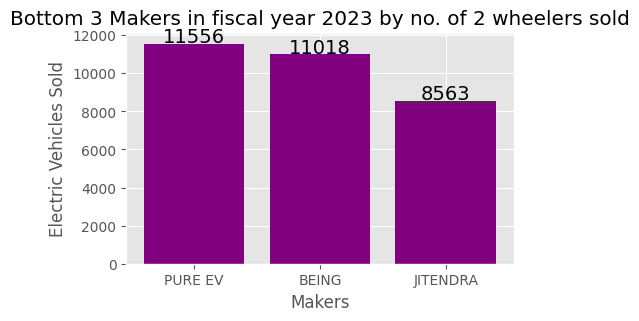

In [22]:
#plot graph for top 3 makers in fiscal year 2023 by number of 2 wheelers sold
plt.figure(figsize=(5, 3))
plt.bar(df["maker"], df["electric_vehicles_sold"], align="center", color='purple')
for i, value in enumerate(df["electric_vehicles_sold"]):    
    plt.text(i, value + 50, str(value), ha='center', fontsize=14)
plt.title("Bottom 3 Makers in fiscal year 2023 by no. of 2 wheelers sold")
plt.xlabel("Makers")
plt.ylabel("Electric Vehicles Sold")
plt.show()


In [23]:
#top 3 makers in fiscal year 2024 by number of 2 wheelers sold
df=pd.merge(left=df_date,right=df_makers,on="date",how="inner")
df=df[(df["fiscal_year"]==2024)&(df["vehicle_category"]=="2-Wheelers")]
df=df.groupby(["maker"],as_index=False)["electric_vehicles_sold"].sum().sort_values(by="electric_vehicles_sold",ascending=False).head(3)
df

,maker,electric_vehicles_sold
9,OLA ELECTRIC,322489
12,TVS,180743
1,ATHER,107552


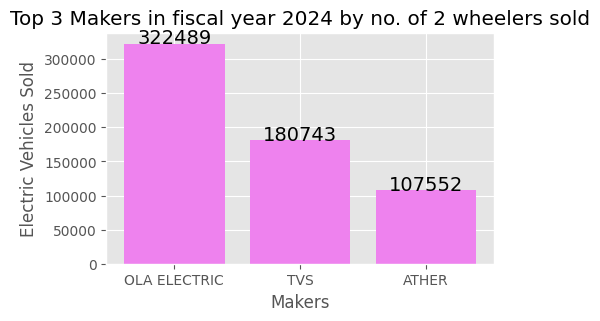

In [24]:
#plot graph for top 3 makers in fiscal year 2023 by number of 2 wheelers sold
plt.figure(figsize=(5,3))
plt.bar(df["maker"], df["electric_vehicles_sold"], align="center", color="violet")
for i, value in enumerate(df["electric_vehicles_sold"]):
    plt.text(i, value + 50, str(value), ha='center', fontsize=14)
plt.title("Top 3 Makers in fiscal year 2024 by no. of 2 wheelers sold")
plt.xlabel("Makers")
plt.ylabel("Electric Vehicles Sold")
plt.show()

In [25]:
#bottom 3 makers in fiscal year 2024 by number of 2 wheelers sold
df=pd.merge(left=df_date,right=df_makers,on="date",how="inner")
df=df[(df["fiscal_year"]==2024)&(df["vehicle_category"]=="2-Wheelers")]
df=df.groupby(["maker"],as_index=False)["electric_vehicles_sold"].sum().sort_values(by="electric_vehicles_sold",ascending=False).tail(3)
df

,maker,electric_vehicles_sold
6,KINETIC GREEN,9585
11,REVOLT,7254
3,BATTRE ELECTRIC,4841


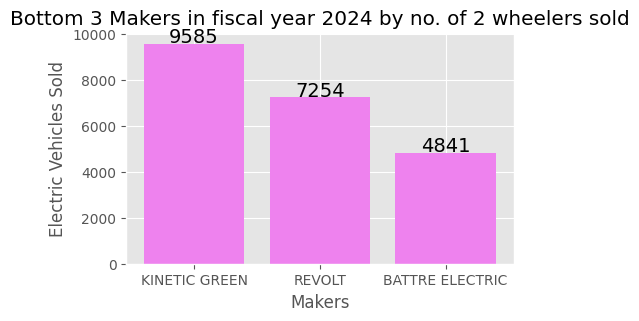

In [26]:
#plot graph for bottom 3 makers in fiscal year 2024 by number of 2 wheelers sold
plt.figure(figsize=(5,3))
plt.bar(df["maker"], df["electric_vehicles_sold"], align="center", color='violet')
for i, value in enumerate(df["electric_vehicles_sold"]):
    plt.text(i, value + 50, str(value), ha='center', fontsize=14)
plt.title("Bottom 3 Makers in fiscal year 2024 by no. of 2 wheelers sold")
plt.xlabel("Makers")
plt.ylabel("Electric Vehicles Sold")
plt.show()

Question 2:
Identify the top 5 states with the highest penetration rate in 2-wheeler and 4-wheeler EV 
sales in FY 2024.

In [27]:
#Highest penetration rate in 2-wheeler and 4-wheeler EV sales in FY 2024

df_sales.head()

,date,state,vehicle_category,electric_vehicles_sold,total_vehicles_sold
0,2021-04-01,Sikkim,2-Wheelers,0,398
1,2021-04-01,Sikkim,4-Wheelers,0,361
2,2021-05-01,Sikkim,2-Wheelers,0,113
3,2021-05-01,Sikkim,4-Wheelers,0,98
4,2021-06-01,Sikkim,2-Wheelers,0,229


In [ ]:
#top 5 states by penetration rate of 2-wheelers in FY 2024
df=pd.merge(left=df_date,right=df_sales,on="date",how="inner")
df=df[(df["fiscal_year"]==2024)&(df["vehicle_category"].isin(["2-Wheelers", ]))]
df["penetration_rate"]=(df["electric_vehicles_sold"]/df["total_vehicles_sold"])*100
df=df.groupby(["state","vehicle_category"],as_index=False)["penetration_rate"].mean().sort_values(by="penetration_rate",ascending=False).head(5)
df
#display(["fiscal_year"])

,state,vehicle_category,penetration_rate
10,Goa,2-Wheelers,18.184784
17,Kerala,2-Wheelers,13.610393
16,Karnataka,2-Wheelers,11.510878
20,Maharashtra,2-Wheelers,10.157240
9,Delhi,2-Wheelers,9.700033


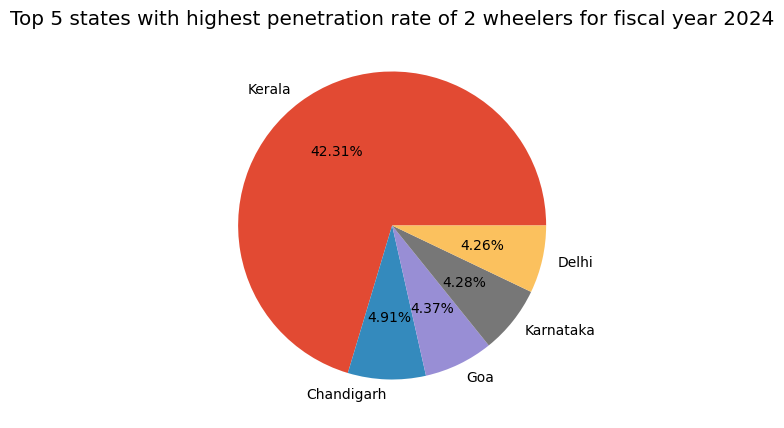

In [50]:
#plot the graph

total=df["penetration_rate"].sum()
plt.figure(figsize=(10,5))
plt.pie(df["penetration_rate"],labels=df["state"],autopct=lambda x:"{:.2f}%".format(x*total/100),startangle=0)
plt.title("Top 5 states with highest penetration rate of 2 wheelers for fiscal year 2024")
plt.show()

In [52]:
#top 5 states by penetration rate of 2-wheelers in FY 2024
df=pd.merge(left=df_date,right=df_sales,on="date",how="inner")
df=df[(df["fiscal_year"]==2024)&(df["vehicle_category"]=="4-Wheelers")]
df["penetration_rate"]=(df["electric_vehicles_sold"]/df["total_vehicles_sold"])*100
df=df.groupby(["state","vehicle_category"],as_index=False)["penetration_rate"].mean().sort_values(by="penetration_rate",ascending=False).head(5)
df
#display(["fiscal_year"])

,state,vehicle_category,penetration_rate
17,Kerala,4-Wheelers,42.309117
6,Chandigarh,4-Wheelers,4.914759
10,Goa,4-Wheelers,4.369512
16,Karnataka,4-Wheelers,4.277313
9,Delhi,4-Wheelers,4.263585


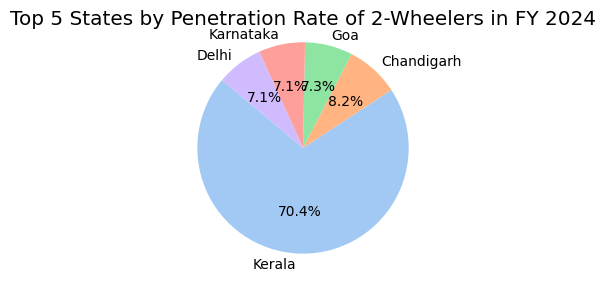

In [46]:
#plot pie graph
plt.figure(figsize=(3, 3))
plt.pie(df["penetration_rate"], labels=df["state"], autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title("Top 5 States by Penetration Rate of 2-Wheelers in FY 2024")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Question 3:
List the states with negative penetration (decline) in EV sales from 2022 to 2024

In [ ]:
#penetration rate for fiscal year 2022

df=pd.merge(left=df_date,right=df_sales,on="date",how="inner")
df_2022 = df.loc[df["fiscal_year"] == 2022].copy()
df_2022["penetration_rate"] = (df_2022["electric_vehicles_sold"] / df_2022["total_vehicles_sold"]) * 100
df_2022



,date,fiscal_year,quarter,state,vehicle_category,electric_vehicles_sold,total_vehicles_sold,penetration_rate
0,2021-04-01,2022,Q1,Sikkim,2-Wheelers,0,398,0.000000
1,2021-04-01,2022,Q1,Sikkim,4-Wheelers,0,361,0.000000
2,2021-04-01,2022,Q1,Andaman & Nicobar Island,2-Wheelers,0,515,0.000000
3,2021-04-01,2022,Q1,Arunachal Pradesh,2-Wheelers,0,1256,0.000000
4,2021-04-01,2022,Q1,Arunachal Pradesh,4-Wheelers,0,724,0.000000
...,...,...,...,...,...,...,...,...
810,2022-03-01,2022,Q4,Tamil Nadu,2-Wheelers,7708,124272,6.202523
811,2022-03-01,2022,Q4,Tripura,2-Wheelers,18,3504,0.513699
812,2022-03-01,2022,Q4,Uttar Pradesh,2-Wheelers,1986,180927,1.097680
813,2022-03-01,2022,Q4,Uttarakhand,2-Wheelers,435,11692,3.720493


In [65]:
#penetration rate for fiscal year 2023
df=pd.merge(left=df_date,right=df_sales,on="date",how="inner")
df_2023 = df.loc[df["fiscal_year"] == 2023].copy()
df_2023["penetration_rate"] = (df_2023["electric_vehicles_sold"] / df_2023["total_vehicles_sold"]) * 100
df_2023
    

,date,fiscal_year,quarter,state,vehicle_category,electric_vehicles_sold,total_vehicles_sold,penetration_rate
815,2022-04-01,2023,Q1,Sikkim,2-Wheelers,0,455,0.000000
816,2022-04-01,2023,Q1,Sikkim,4-Wheelers,0,380,0.000000
817,2022-04-01,2023,Q1,Andaman & Nicobar Island,2-Wheelers,0,407,0.000000
818,2022-04-01,2023,Q1,Arunachal Pradesh,2-Wheelers,0,1063,0.000000
819,2022-04-01,2023,Q1,Arunachal Pradesh,4-Wheelers,0,824,0.000000
...,...,...,...,...,...,...,...,...
1626,2023-03-01,2023,Q4,Tamil Nadu,2-Wheelers,8388,119376,7.026538
1627,2023-03-01,2023,Q4,Tripura,2-Wheelers,23,3016,0.762599
1628,2023-03-01,2023,Q4,Uttar Pradesh,2-Wheelers,3559,206315,1.725032
1629,2023-03-01,2023,Q4,Uttarakhand,2-Wheelers,587,13077,4.488797


In [66]:
#penetration rate for fiscal year 2024
df=pd.merge(left=df_date,right=df_sales,on="date",how="inner")
df_2024 = df.loc[df["fiscal_year"] == 2024].copy()
df_2024["penetration_rate"] = (df_2024["electric_vehicles_sold"] / df_2024["total_vehicles_sold"]) * 100
df_2024



,date,fiscal_year,quarter,state,vehicle_category,electric_vehicles_sold,total_vehicles_sold,penetration_rate
1631,2023-04-01,2024,Q1,Sikkim,2-Wheelers,0,465,0.000000
1632,2023-04-01,2024,Q1,Sikkim,4-Wheelers,0,439,0.000000
1633,2023-04-01,2024,Q1,Andaman & Nicobar Island,2-Wheelers,0,325,0.000000
1634,2023-04-01,2024,Q1,Arunachal Pradesh,2-Wheelers,0,971,0.000000
1635,2023-04-01,2024,Q1,Ladakh,2-Wheelers,0,43,0.000000
...,...,...,...,...,...,...,...,...
2440,2024-03-01,2024,Q4,Mizoram,2-Wheelers,58,1932,3.002070
2441,2024-03-01,2024,Q4,DNH and DD,2-Wheelers,25,780,3.205128
2442,2024-03-01,2024,Q4,Manipur,2-Wheelers,13,1394,0.932568
2443,2024-03-01,2024,Q4,Andaman & Nicobar Island,2-Wheelers,2,447,0.447427


In [ ]:
#states with negative penetration rates from 2022 to 2024
df=

array([], dtype=object)

In [ ]:
# List the states with negative penetration (decline) in EV sales from 2022 to 2024 and also from 2023 to 2024

# Group by state and get mean penetration rate for each year
pen_2022 = df_2022.groupby("state", as_index=False)["penetration_rate"].mean()
pen_2023 = df_2023.groupby("state", as_index=False)["penetration_rate"].mean()
pen_2024 = df_2024.groupby("state", as_index=False)["penetration_rate"].mean()

# Merge penetration rates for all years
pen_compare = pen_2022.merge(pen_2023, on="state", suffixes=('_2022', '_2023'))
pen_compare = pen_compare.merge(pen_2024, on="state")
pen_compare = pen_compare.rename(columns={"penetration_rate": "penetration_rate_2024"})

# States with decline from 2022 to 2024
negative_2022_2024 = pen_compare[pen_compare["penetration_rate_2024"] < pen_compare["penetration_rate_2022"]]

# States with decline from 2023 to 2024
negative_2023_2024 = pen_compare[pen_compare["penetration_rate_2024"] < pen_compare["penetration_rate_2023"]]

print("States with negative penetration from 2022 to 2024:")
print(negative_2022_2024[["state", "penetration_rate_2022", "penetration_rate_2024"]])

print("\nStates with negative penetration from 2023 to 2024:")
print(negative_2023_2024[["state", "penetration_rate_2023", "penetration_rate_2024"]])


States with negative penetration from 2022 to 2024:
                       state  penetration_rate_2022  penetration_rate_2024
0   Andaman & Nicobar Island               0.648338               0.592370
17                    Ladakh               2.638889               2.014572

States with negative penetration from 2023 to 2024:
               state  penetration_rate_2023  penetration_rate_2024
11           Haryana               1.742475               1.472185
12  Himachal Pradesh               0.877833               0.837345
32       Uttarakhand               2.331269               2.155752


Question 4:
 What are the quarterly trends based on sales volume for the top 5 EV makers (4-
wheelers) from 2022 to 2024? 

In [77]:
#quaterly sales on top 5 ev makers from 2022 to 2024 

df=pd.merge(left=df_date,right=df_makers,on="date",how="inner")
df = df[(df["vehicle_category"] == "4-Wheelers") & (df["fiscal_year"].isin([2022, 2023, 2024]))]
top_makers = df.groupby("maker")["electric_vehicles_sold"].sum().sort_values(ascending=False).head(5).index.tolist()
# Filter for top 5 makers
#df_top = df[df["maker"].isin(top_makers)]
#df_top
top_makers

['Tata Motors',
 'Mahindra & Mahindra',
 'MG Motor',
 'BYD India',
 'Hyundai Motor']

In [88]:
# Filter for top 5 makers
df_top = df[df["maker"].isin(top_makers)]
#create quarter column
# Create quarter column using .loc
df_top.loc[:, "quarter"] #= df_top["date"].dt.to_period("Q")

# Group by maker and quarter to get quarterly sales
quarterly_sales = df_top.groupby(["maker", "quarter"])["electric_vehicles_sold"].sum().reset_index().sort_values("quarter")
quarterly_sales

,maker,quarter,electric_vehicles_sold
0,BYD India,Q1,487
16,Tata Motors,Q1,13953
4,Hyundai Motor,Q1,392
12,Mahindra & Mahindra,Q1,13286
8,MG Motor,Q1,2309
17,Tata Motors,Q2,18581
13,Mahindra & Mahindra,Q2,9670
9,MG Motor,Q2,3957
5,Hyundai Motor,Q2,579
1,BYD India,Q2,423


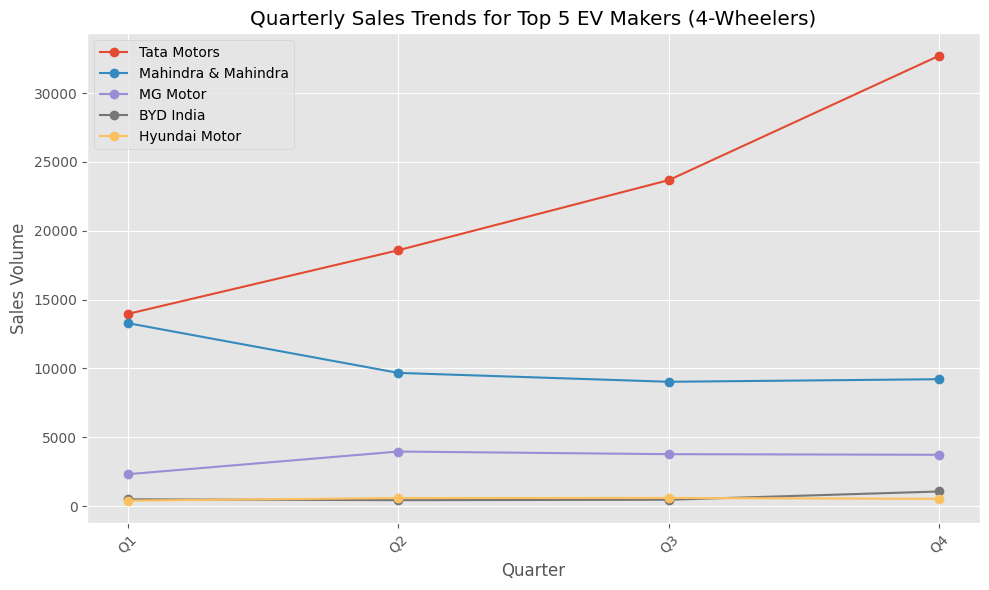

In [91]:
# Plot the sorted quarterly trends
plt.figure(figsize=(10, 6))
for maker in top_makers:
    maker_data = quarterly_sales[quarterly_sales["maker"] == maker]
    plt.plot(maker_data["quarter"].astype(str), maker_data["electric_vehicles_sold"], 
             marker='o', label=maker)

plt.title("Quarterly Sales Trends for Top 5 EV Makers (4-Wheelers)")
plt.xlabel("Quarter")
plt.ylabel("Sales Volume")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Queston 5:  How do the EV sales and penetration rates in Delhi compare to Karnataka for 
2024?

In [107]:
#EV sales and penetration rates in delhi compared to Karnataka for 2024

df = pd.merge(left=df_date, right=df_sales, on="date", how="inner")
#filter for 2024
df_2024 = df[df["fiscal_year"] == 2024]

#compare for delhi and karnataka 
states_compare = df_2024[df_2024["state"].isin(["Delhi", "Karnataka"])]

# Calculate metrics by state and vehicle category
comparison = states_compare.groupby(["state", "vehicle_category"]).agg({
    "electric_vehicles_sold": "sum",
    "total_vehicles_sold": "sum"
}).reset_index()

# Calculate penetration rate
comparison["penetration_rate"] = (comparison["electric_vehicles_sold"] / comparison["total_vehicles_sold"]) * 100

#print detailed comparison
print(comparison.round(2))

       state vehicle_category  electric_vehicles_sold  total_vehicles_sold  \
0      Delhi       2-Wheelers                   38094               405218   
1      Delhi       4-Wheelers                    8630               201130   
2  Karnataka       2-Wheelers                  148111              1279767   
3  Karnataka       4-Wheelers                   12878               302221   

   penetration_rate  
0              9.40  
1              4.29  
2             11.57  
3              4.26  


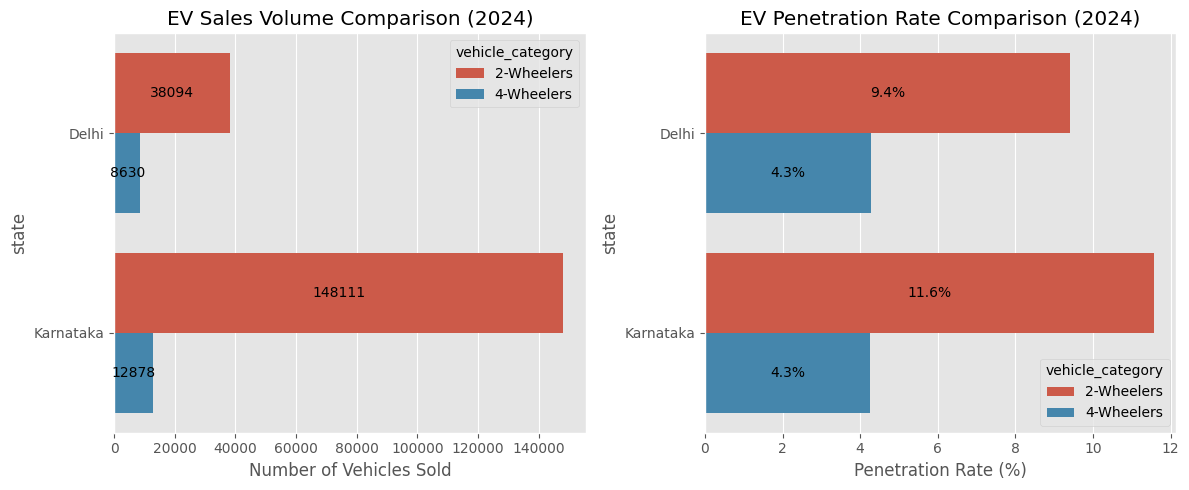

In [111]:
# Plot comparison with horizontal bars
plt.figure(figsize=(12, 5))

# Create subplot for sales volume
plt.subplot(1, 2, 1)
ax1 = sns.barplot(data=comparison, 
                 y="state", 
                 x="electric_vehicles_sold", 
                 hue="vehicle_category",
                 orient="h")
# Add value labels in center of bars
for container in ax1.containers:
    ax1.bar_label(container, label_type='center', fmt='%.0f')
plt.title("EV Sales Volume Comparison (2024)")
plt.xlabel("Number of Vehicles Sold")

# Create subplot for penetration rates  
plt.subplot(1, 2, 2)
ax2 = sns.barplot(data=comparison,
                 y="state",
                 x="penetration_rate",
                 hue="vehicle_category", 
                 orient="h")
# Add percentage labels in center of bars
for container in ax2.containers:
    ax2.bar_label(container, label_type='center', fmt='%.1f%%')
plt.title("EV Penetration Rate Comparison (2024)")
plt.xlabel("Penetration Rate (%)")

plt.tight_layout()
plt.show()

Question 6:List down the compounded annual growth rate (CAGR) in 4-wheeler units for the top 5 
makers from 2022 to 2024. 

In [ ]:
#find number of 4_wheelers sold in fiscal year 2024
df_2024=pd.merge(left=df_date, right=df_makers, on="date", how="inner")
df_2024 = df_2024[(df_2024["fiscal_year"] == 2024)&(df_2024["vehicle_category"] =="4-Wheelers")]
df_2024 = df_2024.groupby(["maker"],as_index=False)["electric_vehicles_sold"].sum().rename(columns={"electric_vehicles_sold": "total_4_wheelers_sold"})
df_2024

,maker,total_4_wheelers_sold
0,BMW India,1078
1,BYD India,1466
2,Hyundai Motor,1390
3,KIA Motors,328
4,MG Motor,8829
5,Mahindra & Mahindra,23346
6,Mercedes -Benz AG,291
7,PCA Automobiles,1533
8,Tata Motors,48181
9,Volvo Auto India,459


In [123]:
#find number of 4_wheelers sold in fiscal year 2022
df_2022=pd.merge(left=df_date, right=df_makers, on="date", how="inner")
df_2022 = df_2022[(df_2022["fiscal_year"] == 2022)&(df_2022["vehicle_category"] =="4-Wheelers")]
df_2022 = df_2022.groupby(["maker"],as_index=False)["electric_vehicles_sold"].sum().rename(columns={"electric_vehicles_sold": "total_4_wheelers_sold"})
df_2022

,maker,total_4_wheelers_sold
0,BMW India,7
1,BYD India,33
2,Hyundai Motor,110
3,KIA Motors,0
4,MG Motor,1647
5,Mahindra & Mahindra,4042
6,Mercedes -Benz AG,26
7,PCA Automobiles,0
8,Tata Motors,12708
9,Volvo Auto India,4


In [136]:
#find CAGR(Compound Annual Growth Rate) from above 2 dataframes by top 5 makers

df=pd.merge(left=df_2022, right=df_2024, on="maker", how="inner")
df["CAGR"] = np.where(df["total_4_wheelers_sold_x"] == 0,  # Check for zero 2022 sales
    0,  # Set CAGR to 0 if 2022 sales were 0
    np.round(((df["total_4_wheelers_sold_y"] / df["total_4_wheelers_sold_x"]) ** (1/2) - 1) * 100, decimals=2)
)
df["CAGR"] = np.where(df["CAGR"] < 0, 0, df["CAGR"])  # Replace negative CAGR with 0
df = df[df["CAGR"] > 0][["maker", "CAGR"]]
df = df.sort_values(by="CAGR", ascending=False).head(5)  # Get top 5 makers by CAGR

df

,maker,CAGR
0,BMW India,1140.97
9,Volvo Auto India,971.21
1,BYD India,566.52
2,Hyundai Motor,255.48
6,Mercedes -Benz AG,234.55


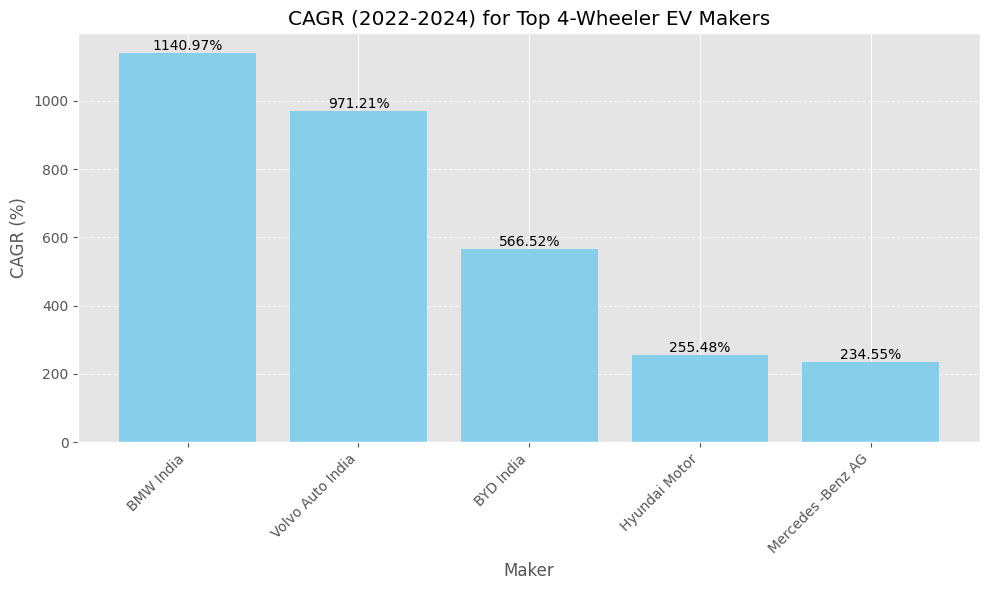

In [137]:
#plot grpah
# Plot CAGR comparison
plt.figure(figsize=(10, 6))
bars = plt.bar(df["maker"], df["CAGR"], color='skyblue')

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}%',
             ha='center', va='bottom')

plt.title("CAGR (2022-2024) for Top 4-Wheeler EV Makers")
plt.xlabel("Maker")
plt.ylabel("CAGR (%)")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Question 7:List down the top 10 states that had the highest compounded annual growth rate 
(CAGR) from 2022 to 2024 in total vehicles sold

In [144]:
# Get total vehicles sold by state for all years
df = pd.merge(left=df_date, right=df_sales, on="date", how="inner")

# Calculate total vehicles for each year
df_2022 = df[df["fiscal_year"] == 2022].groupby("state")["total_vehicles_sold"].sum().reset_index()
df_2022 = df_2022.rename(columns={"total_vehicles_sold": "vehicles_2022"})

df_2023 = df[df["fiscal_year"] == 2023].groupby("state")["total_vehicles_sold"].sum().reset_index()
df_2023 = df_2023.rename(columns={"total_vehicles_sold": "vehicles_2023"})

df_2024 = df[df["fiscal_year"] == 2024].groupby("state")["total_vehicles_sold"].sum().reset_index()
df_2024 = df_2024.rename(columns={"total_vehicles_sold": "vehicles_2024"})

# Merge all years
df_cagr = df_2022.merge(df_2023, on="state").merge(df_2024, on="state")

# Calculate year-over-year growth rates
df_cagr["growth_22_23"] = ((df_cagr["vehicles_2023"]/df_cagr["vehicles_2022"]) - 1) * 100
df_cagr["growth_23_24"] = ((df_cagr["vehicles_2024"]/df_cagr["vehicles_2023"]) - 1) * 100

# Calculate CAGR over entire period
df_cagr["CAGR"] = np.round(((df_cagr["vehicles_2024"]/df_cagr["vehicles_2022"])**(1/2) - 1) * 100, 2)

# Get top 10 states by CAGR
top_10_states = df_cagr.nlargest(10, "CAGR")

top_10_states

,state,vehicles_2022,vehicles_2023,vehicles_2024,growth_22_23,growth_23_24,CAGR
21,Meghalaya,22193,31362,36628,41.314829,16.791021,28.47
9,Goa,48372,73074,78524,51.066733,7.458193,27.41
15,Karnataka,1007894,1404447,1581988,39.344713,12.641346,25.28
8,Delhi,401540,580548,606348,44.580366,4.444077,22.88
27,Rajasthan,880985,1126130,1300476,27.826240,15.481872,21.50
10,Gujarat,1094872,1439692,1590987,31.494092,10.508845,20.55
3,Assam,379450,476195,547626,25.496113,15.000367,20.13
22,Mizoram,19439,24446,27422,25.757498,12.173771,18.77
2,Arunachal Pradesh,19929,23726,27892,19.052637,17.558796,18.30
11,Haryana,528591,642148,732029,21.482961,13.996929,17.68


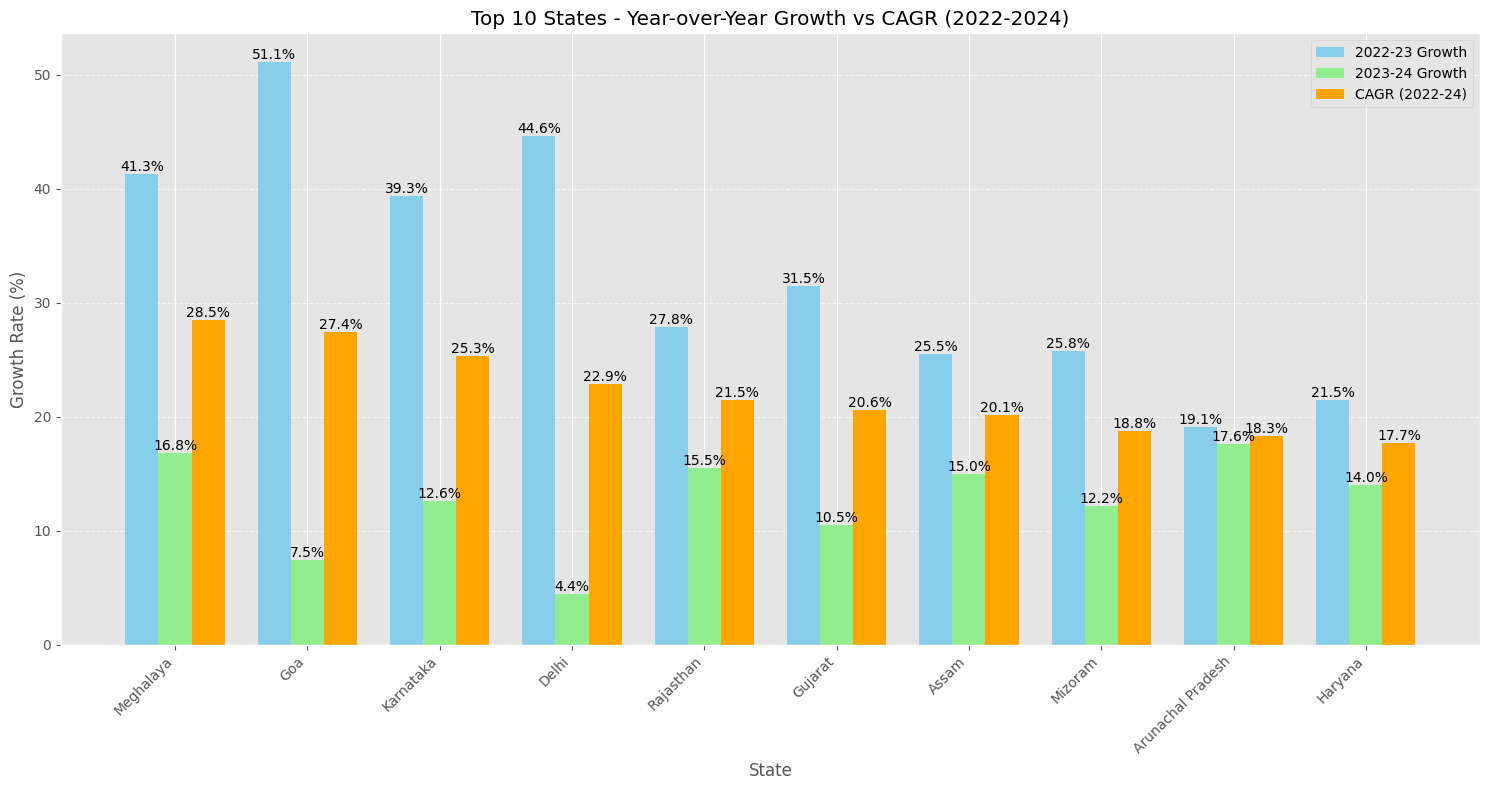

In [143]:
# Create visualization
plt.figure(figsize=(15, 8))

# Plot yearly growth rates and CAGR
x = np.arange(len(top_10_states))
width = 0.25

plt.bar(x - width, top_10_states["growth_22_23"], width, label='2022-23 Growth', color='skyblue')
plt.bar(x, top_10_states["growth_23_24"], width, label='2023-24 Growth', color='lightgreen')
plt.bar(x + width, top_10_states["CAGR"], width, label='CAGR (2022-24)', color='orange')

# Add labels and formatting
plt.xlabel('State')
plt.ylabel('Growth Rate (%)')
plt.title('Top 10 States - Year-over-Year Growth vs CAGR (2022-2024)')
plt.xticks(x, top_10_states["state"], rotation=45, ha='right')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on bars
for i in x:
    plt.text(i - width, top_10_states["growth_22_23"].iloc[i], 
             f'{top_10_states["growth_22_23"].iloc[i]:.1f}%', 
             ha='center', va='bottom')
    plt.text(i, top_10_states["growth_23_24"].iloc[i],
             f'{top_10_states["growth_23_24"].iloc[i]:.1f}%',
             ha='center', va='bottom')
    plt.text(i + width, top_10_states["CAGR"].iloc[i],
             f'{top_10_states["CAGR"].iloc[i]:.1f}%',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

Question 8: What are the peak and low season months for EV sales based on the data from 2022 to 
2024? 

In [158]:
# Find peak and low season for each fiscal year
df = pd.merge(left=df_date, right=df_makers, on="date", how="inner")
df["month_name"] = df["date"].dt.month_name()

# Set month order for fiscal year (April to March)
month_order = ["April", "May", "June", "July", "August", "September", 
               "October", "November", "December", "January", "February", "March"]
df["month_name"] = pd.Categorical(df["month_name"], categories=month_order, ordered=True)

# Group by fiscal year and month
monthly_sales = df.groupby(["fiscal_year", "month_name"], as_index=False)["electric_vehicles_sold"].sum()

# Create pivot table
df_pivot = monthly_sales.pivot(index="month_name", columns="fiscal_year", values="electric_vehicles_sold")

C:\Users\rushi\AppData\Local\Temp\ipykernel_8688\113023989.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_sales = df.groupby(["fiscal_year", "month_name"], as_index=False)["electric_vehicles_sold"].sum()


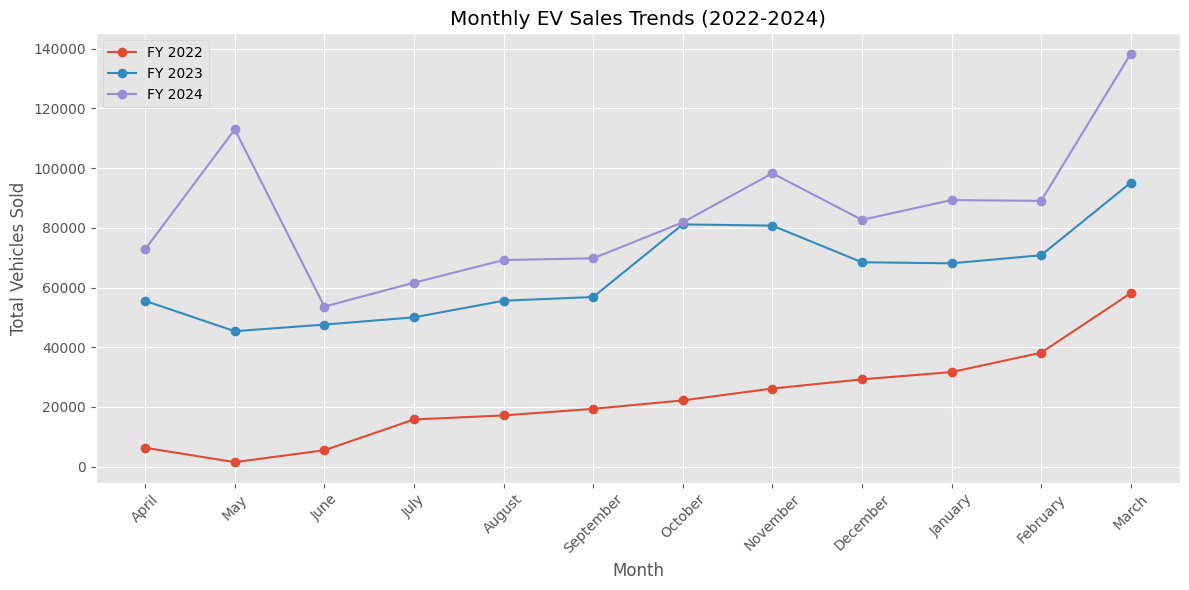

In [157]:
# Plot monthly trends
plt.figure(figsize=(12, 6))
for year in df_pivot.columns:
    plt.plot(df_pivot.index, df_pivot[year], marker='o', label=f'FY {year}')

plt.title("Monthly EV Sales Trends (2022-2024)")
plt.xlabel("Month")
plt.ylabel("Total Vehicles Sold")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


question 9:What is the projected number of EV sales (including 2-wheelers and 4- wheelers) for 
the top 10 states by penetration rate in 2030, based on the compounded annual growth 
rate (CAGR) from previous years? 

In [163]:
# Calculate current penetration rates and CAGR for each state
df = pd.merge(left=df_date, right=df_sales, on="date", how="inner")

# Get 2022 and 2024 data for CAGR calculation
df_2022 = df[df["fiscal_year"] == 2022].groupby("state")[["electric_vehicles_sold", "total_vehicles_sold"]].sum()
df_2024 = df[df["fiscal_year"] == 2024].groupby("state")[["electric_vehicles_sold", "total_vehicles_sold"]].sum()

# Calculate current penetration rate (2024)
df_2024["penetration_rate"] = (df_2024["electric_vehicles_sold"] / df_2024["total_vehicles_sold"]) * 100

# Calculate CAGR (2022-2024)
combined = pd.merge(df_2022, df_2024, on="state", suffixes=('_2022', '_2024'))
combined["CAGR"] = ((combined["electric_vehicles_sold_2024"] / combined["electric_vehicles_sold_2022"]) ** (1/2) - 1) * 100

# Get top 10 states by penetration rate
top_10_states = combined.nlargest(10, "penetration_rate")

# Project sales for 2030 (6 years from 2024)
years_to_project = 6
top_10_states["projected_2030"] = top_10_states["electric_vehicles_sold_2024"] * (1 + top_10_states["CAGR"]/100) ** years_to_project

top_10_states


,electric_vehicles_sold_2022,total_vehicles_sold_2022,electric_vehicles_sold_2024,total_vehicles_sold_2024,penetration_rate,CAGR,projected_2030
state,,,,,,,
Goa,1778,48372,10799,78524,13.752483,146.448337,2.419574e+06
Kerala,13639,689575,73938,638114,11.586958,132.831955,1.177940e+07
Karnataka,43111,1007894,160989,1581988,10.176373,93.243125,8.383406e+06
Maharashtra,48374,1667002,197169,2293994,8.595009,101.889307,1.335115e+07
Delhi,16535,401540,46724,606348,7.705806,68.100075,1.054259e+06
Chandigarh,411,36954,2877,45147,6.372516,164.575131,9.868110e+05
Odisha,9498,479527,39118,618149,6.328248,102.942141,2.732814e+06
Chhattisgarh,4534,390272,28540,503068,5.673189,150.891661,7.118219e+06
Tamil Nadu,36863,1345017,94314,1716940,5.493145,59.953130,1.579547e+06


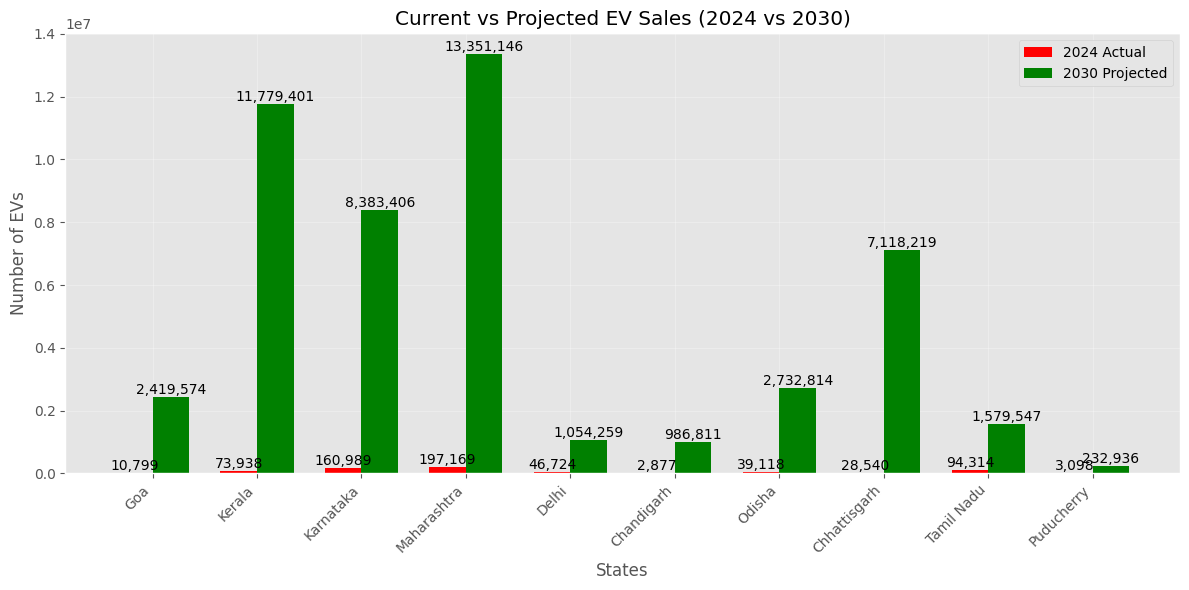

In [168]:
# plot graph
plt.figure(figsize=(12, 6))
x = range(len(top_10_states.index))
width = 0.35

plt.bar(x, top_10_states["electric_vehicles_sold_2024"], width, label="2024 Actual", color="red")
plt.bar([i + width for i in x], top_10_states["projected_2030"], width, label="2030 Projected", color="green")

plt.xlabel("States")
plt.ylabel("Number of EVs")
plt.title("Current vs Projected EV Sales (2024 vs 2030)")
plt.xticks([i + width/2 for i in x], top_10_states.index, rotation=45, ha='right')
plt.legend()

# Add value labels
for i, (current, projected) in enumerate(zip(top_10_states["electric_vehicles_sold_2024"], 
                                           top_10_states["projected_2030"])):
    plt.text(i, current, f'{current:,.0f}', ha='center', va='bottom')
    plt.text(i + width, projected, f'{projected:,.0f}', ha='center', va='bottom')

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


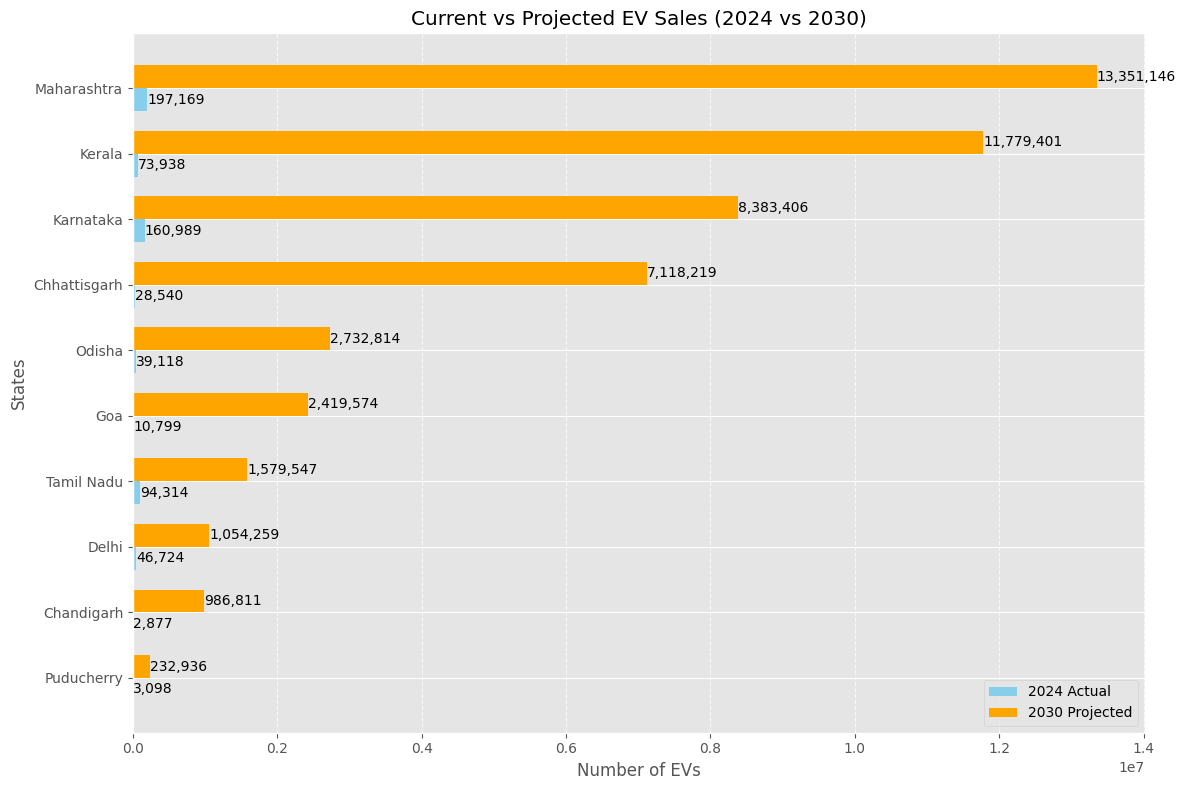

In [169]:
# Create horizontal bar plot
plt.figure(figsize=(12, 8))

# Sort states by projected 2030 sales for better visualization
top_10_states_sorted = top_10_states.sort_values('projected_2030')

# Create horizontal bars
y = range(len(top_10_states_sorted.index))
plt.barh(y, top_10_states_sorted["electric_vehicles_sold_2024"], 
         height=0.35, label="2024 Actual", color="skyblue")
plt.barh([i + 0.35 for i in y], top_10_states_sorted["projected_2030"], 
         height=0.35, label="2030 Projected", color="orange")

# Customize plot
plt.ylabel("States")
plt.xlabel("Number of EVs")
plt.title("Current vs Projected EV Sales (2024 vs 2030)")
plt.yticks([i + 0.175 for i in y], top_10_states_sorted.index)
plt.legend(loc='lower right')

# Add value labels
for i, (current, projected) in enumerate(zip(top_10_states_sorted["electric_vehicles_sold_2024"], 
                                           top_10_states_sorted["projected_2030"])):
    plt.text(current, i, f'{current:,.0f}', va='center')
    plt.text(projected, i + 0.35, f'{projected:,.0f}', va='center')

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

